In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
from matplotlib import rc
from numpy import genfromtxt
import scipy as sci
import math
import sys
import os

In [2]:
## Imported data from Figure 01 of https://arxiv.org/pdf/1211.5199.pdf ###
## Electron Neutrino Flux in units of Neutrinos / cm^2 / day as a function of energy (MeV)
ElectronNeutrino_DataFile = 'SNS-electronNeutrino-flux.csv'
MuonAntiNeutrino_DataFile = 'SNS-antimuonneutrino-flux.csv'

In [3]:
### Loading the data into x & y variables I can manipulate ###
ElectronNu_data = np.loadtxt(ElectronNeutrino_DataFile, delimiter=',')
x_ENu_Energy = ElectronNu_data[:,0]
y_ENu_Flux = ElectronNu_data[:,1]

AntiMuonNu_data = np.loadtxt(MuonAntiNeutrino_DataFile, delimiter=',')
x_aMuNu_Energy = AntiMuonNu_data[:,0]
y_aMuNu_Flux = AntiMuonNu_data[:,1]

In [4]:
### To calculate the number of target nucleons I need the molar mass of argon (39.948 g/mol)
### The number of grams of argon (size of the target = density x volume) density = 1.3954 g/cm^3
### Avagodro's number 6.022e+23 particles / mol
### And I will assume the detector is 1 cubic meter in size

# N_Targets = (Part / mol) x (mol / g) x (g / cm^3) x (cm^3 x m^3)
N_Targets = 6.022e+23 * (1/39.948) * (1.3954) * (1000000)

In [5]:
### Taking the cross-section from https://arxiv.org/pdf/1907.03379.pdf section 5.1
### We'll assume the cross-section is constant (should fix this assumption!!!)
Electron_Neutrino_CrossSection = 9.23E-42 # (cm-2)

AntiMu_Neutrino_CrossSection = 1.34E-42

In [6]:
EventRate_ElectronNu = y_ENu_Flux * N_Targets * Electron_Neutrino_CrossSection
EventRate_AntiMuNu = y_aMuNu_Flux * N_Targets * AntiMu_Neutrino_CrossSection


<IPython.core.display.Javascript object>


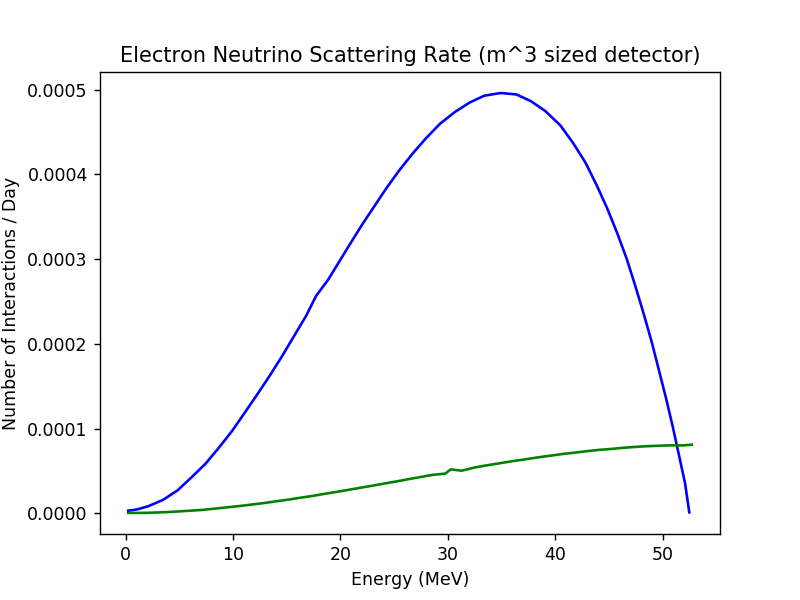

Text(0, 0.5, 'Number of Interactions / Day')

In [7]:
plt.figure()
#plt.rc('text', usetex=True)
plt.title("Electron Neutrino Scattering Rate (m^3 sized detector)")
plt.plot( x_ENu_Energy, EventRate_ElectronNu, 'b')
plt.plot( x_aMuNu_Energy,EventRate_AntiMuNu, 'g')

plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Interactions / Day')
#plt.legend(( '\nu_e e \rightarrow \nu_e e','Averaged Pulse', 'Smoothed Pulse'),
#           loc='upper right')

In [9]:
TotalEvents = np.sum(EventRate_ElectronNu) + np.sum(EventRate_AntiMuNu)
print(TotalEvents)

0.014631623113623007
